# Batch processing transaction data with pandas
Dataset: https://www.kaggle.com/conorsully1/simulated-transactions

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

path = "/Users/conorosully/Google Drive/My Drive/Medium/Pandas Batch/"

In [ ]:
#Gives an error
df = pd.read_csv('../data/transactions.csv')

In [7]:
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

#Load rows 1001 to 3000
df = pd.read_csv('../data/transactions.csv',
                 skiprows=1000,
                 nrows=2000,
                 names=names)

In [2]:
def get_rows(steps,count,names,path='../Data/transactions.csv'):
    
    """
    Returns a subset of rows from a CSV. The fist [steps]*[count] 
    rows are skipped and the next [steps] rows are returned. 
    
    params
    ------------
        steps: number of rows returned
        count: count variable updated each iteration 
        names: columns names of dataset
        path: location of csv
    """
    
    if count ==0:
        df = pd.read_csv(path,
                         nrows=steps)
    else: 
        df = pd.read_csv(path,
                         skiprows=steps*count,
                         nrows=steps,
                         names=names)
    return df
    

## Total number of transactions

In [8]:
begin = datetime.datetime.now()


steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

#Initialise number of transactions
n = 0

#Initialise count
count = 0
while True:
    
    #Return subsection of dataset
    df = get_rows(steps,count,names)
    
    #Update number of transactions
    n+=len(df)
    
    #Update count
    count+=1
    
    #Exit loop
    if len(df)!=steps:
        break

#Output number of rows
print(n)  

print(datetime.datetime.now() - begin)

261969720
0:47:40.731500


## Total yearly expediture 

In [13]:
begin = datetime.datetime.now()

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

#Initialise yearly totals
total_exp = pd.Series([0.0]*11, index=range(2010,2021))

count = 0
while True:
    
    df = get_rows(steps,count,names)

    #Get yearly totals for subsection
    exp = df.groupby(['YEAR'])['AMOUNT'].sum()
    
    #Loop over years 2010 to 2020
    for year in range(2010,2021):
        #Update yearly totals
        total_exp[year] += exp[year]
    
    count+=1
    print(count,end=" ")
    #Exit loop
    if len(df)!=steps:
        break
print()
print(total_exp)  

print(datetime.datetime.now() - begin)

1 

/Users/conorosully/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 
2010    2.041377e+08
2011    5.842620e+08
2012    9.596104e+08
2013    1.324468e+09
2014    1.699034e+09
2015    2.058469e+09
2016    2.399227e+09
2017    2.709008e+09
2018    2.997901e+09
2019    3.267153e+09
2020    3.163759e+09
dtype: float64
0:48:47.387897


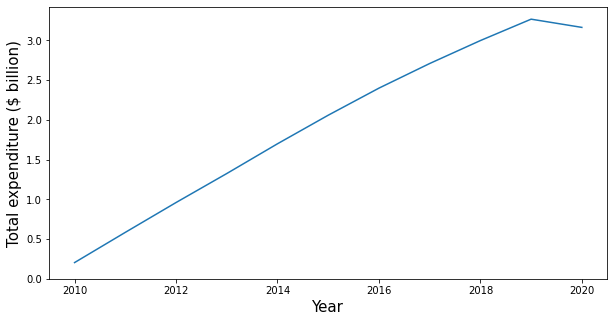

In [14]:
#Plot aggregation
plt.figure(figsize=(10, 5))

plt.plot(total_exp.index,total_exp/1000000000)
plt.ylabel('Total expenditure ($ billion)',size=15)
plt.xlabel('Year',size=15)
plt.ylim(bottom=0)

plt.savefig(path+"agg_1.png",dpi=100)

## Average monthly entertainment expenditure in 2020

In [ ]:
begin = datetime.datetime.now()

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

#Create empty total expenditure dataframe
total_exp = pd.DataFrame(columns=['CUST_ID','MONTH','AMOUNT'])

count = 0
while True:
    
    df = get_rows(steps,count,names)

    #Calculate monthly totals for each customer
    df_2020 = df[(df.YEAR==2020) & (df.EXP_TYPE=='Entertainment')]
    sum_exp = df_2020.groupby(['CUST_ID','MONTH'],as_index=False)['AMOUNT'].sum()
    
    #Append monthly totals
    total_exp = total_exp.append(sum_exp)
    
    #Aggregate again so CUST_ID and MONTH are unique
    total_exp = total_exp.groupby(['CUST_ID','MONTH'],as_index=False)['AMOUNT'].sum()
    
    count+=1
    print(count,end=" ")
    #Exit loop
    if len(df)!=steps:
        break

#Final aggregations
avg_exp = sum_exp.groupby(['MONTH'])['AMOUNT'].mean()

print()
print(datetime.datetime.now() - begin)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 

In [ ]:
#Plot aggregation
plt.figure(figsize=(10, 5))
plt.plot(avg_exp.index,avg_exp)
plt.ylabel('Average entertainment expenditure',size=12)
plt.xlabel('Month',size=15)
plt.ylim(bottom=0)

plt.savefig(path+"agg_2.png",dpi=100)